## Linear Regression Implementation

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

In [91]:
load_wine()

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [92]:
df = load_wine()

In [93]:
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names
dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [94]:
# independent and dependent data
X = dataset
y = df.target

In [95]:
X.shape

(178, 13)

In [96]:
y.shape

(178,)

In [97]:
# train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [98]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


In [99]:
# Standardizing the dataset 
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [100]:
from sklearn.linear_model import LinearRegression


regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [101]:
# Cross validation
from sklearn.model_selection import cross_val_score

In [102]:
mse = cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
mse
# 10 different data will be used to train the same model and we will get 10 different accuracy based on them

array([-0.04834932, -0.07912427, -0.11272045, -0.08053139, -0.0183107 ,
       -0.08293101, -0.08029653, -0.08358881, -0.07141881, -0.16135145])

In [103]:
np.mean(mse)

-0.08186227388990133

In [104]:
# Prediction 
reg_predict = regression.predict(X_test)
reg_predict

array([ 0.14594049,  0.30998051,  1.5758875 ,  0.31869125,  0.92475253,
        0.1837942 ,  1.01722555,  2.02226235,  0.57964359,  1.45469377,
        0.19415701,  2.02555238,  0.43492171,  1.36215779,  0.15244681,
        1.13524264,  1.32469631,  1.1569627 ,  0.10458744,  1.01195334,
       -0.33932979,  0.53290485,  1.19343348,  2.12257676,  2.22458593,
        2.06149605,  1.08728953,  0.79527028,  1.1444924 ,  0.57321692,
        0.17975194,  1.15581684,  1.71552938,  0.11841234,  0.0462227 ,
       -0.22884938,  2.26007594,  2.16814691,  0.57197047,  2.26052051,
        0.25808289,  1.13124553,  0.7808054 ,  1.04296525,  1.6330558 ,
        0.15939983,  0.80074843,  1.24768905,  2.04386362, -0.1184767 ,
        1.03401345,  0.253605  , -0.03123495,  2.07225025])

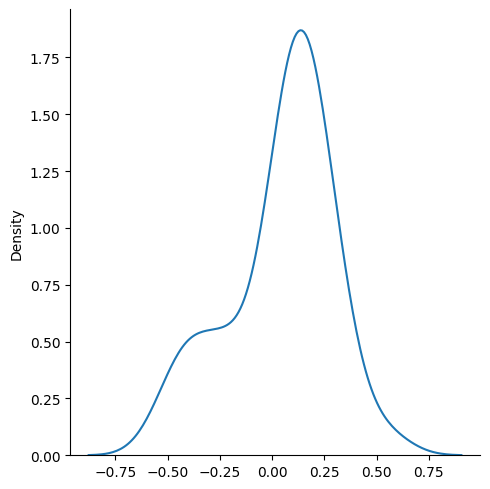

In [105]:
# Comparing predictions to true values (y_test)
import seaborn as sns
sns.displot(reg_predict-y_test,kind='kde')

In [107]:
from sklearn.metrics import r2_score
score_r2 = r2_score(reg_predict,y_test)
score_r2

0.8892308591627869

In [111]:
y_test.shape

(54,)

In [115]:
base_array = np.arange(1, 55)
base_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

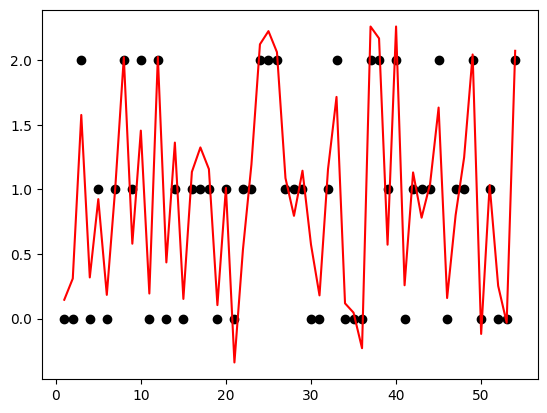

In [130]:
plt.scatter(base_array,y_test,c='black')
plt.plot(base_array,reg_predict,c='r')

plt.show()

(54,)